`EDA & TEST`

In [130]:
import pandas as pd 
import numpy as np
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### load Data

In [131]:
PATH = '/Users/kwonkyoungmi/workspaces/workspace_Python/Git_AtAiffel/datathon/data/MentalHealth'
data = pd.read_csv(os.path.join(PATH,'df_final.csv'))

In [132]:
# 결측값 확인
data.isnull().sum()

id                         0
name                       0
gender                     0
age                        0
age_group                  0
city                       0
profession                 0
cgpa                       0
degree                     0
work_study_pressure        0
work_study_satisfaction    0
financial_stress           0
sleep_duration             0
dietary_habits             0
work_study_hours           0
family_mh_history          0
suicidal_thoughts          0
depression                 0
urban_rural                0
dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51880 entries, 0 to 51879
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       51880 non-null  int64  
 1   name                     51880 non-null  object 
 2   gender                   51880 non-null  int64  
 3   age                      51880 non-null  float64
 4   age_group                51880 non-null  object 
 5   city                     51880 non-null  object 
 6   profession               51880 non-null  object 
 7   cgpa                     51880 non-null  float64
 8   degree                   51880 non-null  object 
 9   work_study_pressure      51880 non-null  float64
 10  work_study_satisfaction  51880 non-null  float64
 11  financial_stress         51880 non-null  float64
 12  sleep_duration           51880 non-null  object 
 13  dietary_habits           51880 non-null  object 
 14  work_study_hours      

In [134]:
data['gender'].value_counts()

gender
0    29425
1    22455
Name: count, dtype: int64

In [135]:
data['age_group'].value_counts()

age_group
46-55    14140
36-45    12243
26-35     9393
18-25     9082
56-65     7022
Name: count, dtype: int64

#### 데이터 탐색하기

In [136]:
data.columns

Index(['id', 'name', 'gender', 'age', 'age_group', 'city', 'profession',
       'cgpa', 'degree', 'work_study_pressure', 'work_study_satisfaction',
       'financial_stress', 'sleep_duration', 'dietary_habits',
       'work_study_hours', 'family_mh_history', 'suicidal_thoughts',
       'depression', 'urban_rural'],
      dtype='object')

In [137]:
data.describe()

,id,gender,age,cgpa,work_study_pressure,work_study_satisfaction,financial_stress,work_study_hours,family_mh_history,suicidal_thoughts,depression
count,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000,51880.000000
mean,70408.881515,0.432826,40.373439,1.518318,3.048265,2.980127,3.000702,6.272899,0.499480,0.494256,0.184426
std,40628.649482,0.495472,12.438310,3.139421,1.395562,1.398014,1.415004,3.836287,0.500005,0.499972,0.387835
min,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,35221.750000,0.000000,29.000000,0.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000
50%,70597.000000,0.000000,42.000000,0.000000,3.000000,3.000000,3.000000,6.000000,0.000000,0.000000,0.000000
75%,105737.250000,1.000000,51.000000,0.000000,4.000000,4.000000,4.000000,10.000000,1.000000,1.000000,0.000000
max,140698.000000,1.000000,60.000000,10.000000,5.000000,5.000000,5.000000,12.000000,1.000000,1.000000,1.000000


In [138]:
data.groupby('urban_rural')['city'].value_counts()

urban_rural  city     
rural        Meerut       5522
             Rajkot       5204
             Srinagar     5065
             Agra         4681
             Varanasi     4600
urban        Ahmedabad    5605
             Mumbai       4964
             Hyderabad    4491
             Bangalore    4119
             Chennai      4041
             Delhi        3588
Name: count, dtype: int64

In [139]:
data.urban_rural.value_counts()

urban_rural
urban    26808
rural    25072
Name: count, dtype: int64

### 동일성 검정 함수 정의
- 범주형 데이터 : 카이제곱 검정
- 숫자형 연속 데이터 : t-검정

In [140]:
# 카이제곱 검정
def chi2_test(dataframe, group_col, target_col, alpha=0.05):
    """
    Perform Chi-squared test of independence between two categorical variables.

    Args:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        group_col (str): The column name for the grouping variable.
        target_col (str): The column name for the target variable.
        alpha (float): Significance level for the test (default is 0.05)

    if p_value < alpha: two colums are significantly related. = diffrent distribution
       p_value > alpha: two colums are not significantly related. = similar distribution
    """

    # 그룹 컬럼의 고유 값 확인 (두 개여야 함)
    unique_groups = dataframe[group_col].unique()
    group1_name, group2_name = unique_groups[0], unique_groups[1]

    # Create contingency table
    import pandas as pd
    from scipy.stats import chi2_contingency    
    contingency_table = pd.crosstab(dataframe[group_col], dataframe[target_col])

    # Perform Chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\n카이제곱 통계량: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    # 검정 결과 해석
    if p_value < alpha:
        print(f"'{group1_name}' 그룹과 '{group2_name}' 그룹에서 '{target_col}'의 분포는 다름")
    else:
        print(f"{group1_name}' 그룹과 '{group2_name}' 그룹에서 '{target_col}'의 분포는 동일")


In [141]:
def independent_t_test(dataframe, group_col, target_col, alpha=0.05):
    """
    두 독립 그룹 간에 특정 연속형 변수의 평균 차이를 독립표본 t-검정으로 검정합니다.
    등분산성(Levene's test)을 먼저 확인한 후, 그 결과에 따라 적절한 t-검정을 수행합니다.

    Args:
        dataframe (pd.DataFrame): 분석할 데이터프레임
        group_col (str): 두 그룹을 나누는 기준 컬럼 (예: 'urban_rural')
                         이 컬럼은 정확히 두 개의 고유한 값을 가져야 합니다
        target_col (str): 평균 차이를 검정할 연속형 변수 컬럼 (예: 'age', 'cgpa')
        alpha (float, optional): 유의수준 (기본값: 0.05)
    """
    print(f"\n--- '{group_col}' 그룹 간 '{target_col}' 평균 차이 독립표본 t-검정 -------------------------\n")

    from scipy import stats

    # 그룹 컬럼의 고유 값 확인
    unique_groups = dataframe[group_col].unique()

    group1_name, group2_name = unique_groups[0], unique_groups[1]

    # 각 그룹별 데이터 추출 및 결측치 제거
    group1_data = dataframe[dataframe[group_col] == group1_name][target_col].dropna()
    group2_data = dataframe[dataframe[group_col] == group2_name][target_col].dropna()

    # 그룹별 기술 통계량 (평균, 표준편차) 확인
    print(f"  '{group1_name}' 그룹 '{target_col}' 평균: {group1_data.mean():.2f}, (표준편차: {group1_data.std():.2f}, N={len(group1_data)})")
    print(f"  '{group2_name}' 그룹 '{target_col}' 평균: {group2_data.mean():.2f}, (표준편차: {group2_data.std():.2f}, N={len(group2_data)})")

    # 1. 등분산성 검정 (Levene's test)
    # 귀무가설 (H0): 두 그룹의 분산이 동일하다.
    # 대립가설 (H1): 두 그룹의 분산이 다르다.
    levene_stat, levene_p_value = stats.levene(group1_data, group2_data)
    print(f"\n  Levene's Test (등분산성 검정) => 통계량: {levene_stat:.4f}, p-value: {levene_p_value:.4f}")

    # 2. 독립표본 t-검정 수행
    # p-value가 유의수준(0.05)보다 작으면 귀무가설 기각
    if levene_p_value > alpha: # 등분산 가정이 충족될 경우 (p > alpha)
        # 등분산 가정 하에 t-검정
        t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=True)
        print("  --> 분산이 동일하다는 가정 하에 t-검정 (Equal variances assumed)")
    else: # 등분산 가정이 충족되지 않을 경우 (p <= alpha)
        # 등분산 가정을 하지 않는 웰치(Welch)의 t-검정
        t_stat, p_value = stats.ttest_ind(group1_data, group2_data, equal_var=False)
        print("  --> 분산이 동일하지 않다는 가정 하에 t-검정 (Welch's t-test)")

    if p_value < alpha:
        print(f"\n t-통계량: {t_stat:.4f}, p-value ({p_value:.4f}) : '{group1_name}' 그룹과 '{group2_name}' 그룹의 '{target_col}' 평균은 통계적으로 유의미하게 다릅니다.")
    else:
        print(f"\n t-통계량: {t_stat:.4f}, p-value ({p_value:.4f}) : '{group1_name}' 그룹과 '{group2_name}' 그룹의 '{target_col}' 평균이 통계적으로 유의미하게 다르다고 말하기 어려움")


### 조사인구특성

In [142]:
demo = ['gender','age_group','urban_rural','degree']
urban = data[data['urban_rural'] == 'urban']
rural = data[data['urban_rural'] == 'rural']
df_demo = data.copy()

#### 동일성 검정

In [143]:
target_variables = ['gender', 'age_group', 'profession', 'degree']

for var in target_variables:
    chi2_test(df_demo, 'urban_rural', var)


카이제곱 통계량: 14.3063
p-value: 0.0002
'rural' 그룹과 'urban' 그룹에서 'gender'의 분포는 다름

카이제곱 통계량: 66.4090
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'age_group'의 분포는 다름

카이제곱 통계량: 261.2390
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'profession'의 분포는 다름

카이제곱 통계량: 343.4051
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'degree'의 분포는 다름


In [144]:
degree_group = {
    'Unknown': 'UNK',
    'HighSchool': 'UG-',

    # Undergraduate (학사)
    'BHM': 'UG',
    'LLB': 'UG',
    'BPharm': 'UG',
    'BBA': 'UG',
    'BSc': 'UG',
    'BE': 'UG',
    'BArch': 'UG',
    'BCA': 'UG',
    'BA': 'UG',
    'BCom': 'UG',
    'BH': 'UG',
    'BEd': 'UG',
    'BTech': 'UG',

    # Postgraduate (석사 이상)
    'MBA': 'PG',
    'MCom': 'PG',
    'MHM': 'PG',
    'MA': 'PG',
    'MTech': 'PG',
    'PhD': 'PG',
    'MEd': 'PG',
    'MSc': 'PG',
    'LLM': 'PG',
    'MCA': 'PG',
    'MD': 'PG',
    'MBBS': 'UG', # MBBS는 학사로 분류
    'MPharm': 'PG',
    'MPA': 'PG',
    'ME': 'PG',
    'MArch': 'PG'
}

# 카테고리 매핑
df_demo['degree_level'] = df_demo['degree'].map(degree_group)

In [145]:
job_cat = {
    # 학생 및 무직
    'student': 'STU',
    'unemployed': 'UNEMP',

    # IT & 기술직
    'software engineer': 'TECH',
    'data scientist': 'TECH',
    'ux/ui designer': 'TECH',
    'digital marketer': 'MGMT',  # 디지털 마케팅은 관리/경영 직군으로 분류
    'analyst': 'TECH',
    'research analyst': 'TECH',

    # 전문직
    'doctor': 'PROF',
    'medical doctor': 'PROF',
    'pharmacist': 'PROF',
    'accountant': 'PROF',
    'lawyer': 'PROF',
    'judge': 'PROF',
    'investment banker': 'PROF',

    # 관리자/경영/분석
    'manager': 'MGMT',
    'marketing manager': 'MGMT',
    'hr manager': 'MGMT',
    'business analyst': 'MGMT',
    'financial analyst': 'MGMT',
    'city manager': 'MGMT',

    # 서비스/지원
    'customer support': 'SERV',
    'sales executive': 'SERV',
    'travel consultant': 'SERV',
    'family consultant': 'SERV',
    'content writer': 'CRE', # 수정
    'chef': 'SERV',

    # 교육 및 학문
    'teacher': 'EDU',
    'academic': 'EDU',
    'educational consultant': 'EDU',
    'researcher': 'EDU',

    # 컨설팅
    'consultant': 'CONS',

    # 엔지니어링
    'civil engineer': 'ENG',
    'mechanical engineer': 'ENG',
    'architect': 'ENG',

    # 창작/디자인
    'graphic designer': 'CRE',
    'pilot': 'CRE',
    'entrepreneur': 'CRE',  # 자영업자 창업자도 여기에 넣음 (유동적)

    # 기타
    # 생략된 경우 자동으로 'OTH' 처리 가능
}

df_demo['profession_group'] = df_demo['profession'].map(job_cat).fillna('OTH')

In [196]:
df_demo[df_demo['profession_group'] == 'OTH']['profession'].value_counts()

profession
chemist        1032
plumber         658
electrician     524
Name: count, dtype: int64

In [ ]:
# 'age_group'
# 도시에는 20대 비중이 압도적으로 높고, 시골은 상대적으로 낮음 → 청년층의 도시 유입이 뚜렷함.
age_crosstab = pd.crosstab(df_demo['age_group'], df_demo['urban_rural'])

chi2_age, p_age, dof_age, expected_age = chi2_contingency(age_crosstab)

print(f"Chi2 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")

In [ ]:
# 그래프 코드

age_order = ['18-25', '26-35', '36-45', '46-55', '56-65']
df_demo['age_group'] = pd.Categorical(df_demo['age_group'], categories=age_order, ordered=True)

age_crosstab = pd.crosstab(df_demo['age_group'], df_demo['urban_rural'], normalize='columns') * 100
age_crosstab = age_crosstab.loc[age_order]

age_crosstab.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightblue'])

plt.title("Age Group Distribution by Location (%)")
plt.xlabel("Age Group")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# gender

urban_gender = df_demo[df_demo['urban_rural'] == 'urban']['gender'].value_counts(normalize=True) * 100
rural_gender = df_demo[df_demo['urban_rural'] == 'rural']['gender'].value_counts(normalize=True) * 100

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['lightblue', 'lightpink']  # 남성, 여성 색상

# 도시
axs[0].pie(urban_gender, labels=urban_gender.index, autopct='%1.1f%%', colors=colors, startangle=90,wedgeprops={'width':0.6})
axs[0].set_title('Urban Gender Distribution')

# 중소도시
axs[1].pie(rural_gender, labels=rural_gender.index, autopct='%1.1f%%', colors=colors, startangle=90,wedgeprops={'width':0.6})
axs[1].set_title('Rural Gender Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# 'profession'


from scipy.stats import chi2_contingency

# 교차표 생성
ct = pd.crosstab(df_demo['profession_group'], data['urban_rural'])

# 카이제곱 독립성 검정 수행
chi2, p, dof, expected = chi2_contingency(ct)

print(f"Chi2 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")

""" 
도시는 학생(STU), 무직/구직자(UNEMP), 교육(EDU) 관련 직군의 비중이 높음
→ 교육·취업을 위한 이동, 혹은 도시의 교육산업 집중 가능성 시사

Chi2 통계량: 91.53
p-value: 0.0000 
>> 도시와 시골 간 직업군 분포에는 통계적으로 유의미한 차이가 있음. 두 지역의 직업 구성 비율이 확실히 다르다.

특징:  도시는 STU (학생) 직군이 뚜렷하게 많고, 시골은 EDU (교육·학문) 직군의 비중이 상대적으로 더 큼.
>> 도시에 학업·진학 목적의 인구 집중, 시골 지역의 교사·교육 종사자 비율 증가

도시는 학생, 기타 다양성 높은 직군, 컨설팅 및 구직자가 많음
>> 교육과 커리어 초입 인구가 집중된 구조.

시골은 기초 전문직, 지역 교육자, 생활 서비스 종사자 중심
>>지역사회를 유지하는 직업군 중심의 구조.
"""

In [ ]:
# 그래프 코드

job_counts_raw = pd.crosstab(df_demo['profession_group'], df_demo['urban_rural'])

job_order = job_counts_raw.sum(axis=1).sort_values(ascending=False).index

job_counts_percent = pd.crosstab(df_demo['profession_group'], df_demo['urban_rural'], normalize='columns') * 100
job_counts_percent = job_counts_percent.loc[job_order]

job_counts_percent.plot(kind='bar', figsize=(12,6), color=['lightcoral','lightblue'], alpha=0.8)
plt.title("Urban vs Rural Profession Group Distribution")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

In [ ]:
# 'degree_level'

degree_crosstab = pd.crosstab(df_demo['degree_level'], df_demo['urban_rural'], normalize='columns') * 100

# 카이제곱 검정
degree_raw_counts = pd.crosstab(df_demo['degree_level'], df_demo['urban_rural'])
chi2, p, dof, expected = chi2_contingency(degree_raw_counts)

print(f"Chi2 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")

""" 
시골은 Undergraduate(학사) 비율이 더 높고, 도시는 High School(고졸) 비율이 높음
→ 단순한 학력 격차보단 청년층의 교육 달성 후 도시로 이동하는 흐름을 암시

Chi2 통계량: 90.28
p-value: 0.0000
>> 도시와 시골 간 학위 수준 분포에 통계적으로 유의미한 차이가 있음. 두 지역의 학위 구성 비율이 확실히 다르다.

특징: 시골은 Undergraduate(학사) 비율이 더 높고, 도시는 High School(고졸) 비율이 높음
"""

In [ ]:
# 1. unknown 제거
valid_degrees = df_demo[df_demo['degree_level'].str.lower() != 'unknown']

# 2. 고정된 순서 지정
degree_order = ['High School', 'Undergraduate', 'Postgraduate']

# 3. 교차표 계산
degree_crosstab = pd.crosstab(
    valid_degrees['degree_level'],
    valid_degrees['urban_rural'],
    normalize='columns'
) * 100

# 4. 지정 순서로 정렬 (누락된 값은 0으로 처리)
degree_crosstab = degree_crosstab.reindex(degree_order).fillna(0)

# 5. 색상 자동 조절
colors = ['lightcoral', 'lightblue'][:degree_crosstab.shape[1]]

# 6. 그래프 출력
degree_crosstab.plot(kind='bar', figsize=(10, 6), color=colors, alpha=0.8)
plt.title("Urban vs Rural Degree Level Distribution")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

In [ ]:
# 직업군에서 학위 수준비교

crosstab = pd.crosstab(df_demo['profession_group'], df_demo['degree_level'])

# 카이제곱 검정
chi2_pd, p_pd, dof_pd, expected_pd = chi2_contingency(crosstab)

print(f"Chi2 통계량: {chi2_pd:.2f}")
print(f"p-value: {p_pd:.4f}")

In [ ]:
# 그래프 코드

ct = pd.crosstab(df_demo['profession_group'], df_demo['degree_level'], normalize='index')  # 비율로 보기 좋음
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt=".2f")
plt.title('직업군별 학위 수준 비율 (정규화)')
plt.xlabel('학위 수준')
plt.ylabel('직업군')
plt.show()

In [ ]:
# 연령대와 직업군 사이의 관계 분석
""" 
Chi2 통계량: 29215.76
p-value: 0.0 >> 연령대와 직업군 간에는 통계적으로 유의미한 관계가 없음.

특징: 18–25세에서는 학생과 구직자가 많고, 이들이 주로 도시에 집중되어 있음.
>> 도시가 교육과 커리어 초입 인구의 중심지로 기능하고 있음을 보여주고, 

시골은 교육자, 서비스직 등 지역사회 기반 직업군 중심의 구조를 보임.
즉 산업 중심이 아닌 **지역사회가 활성화 될 수 있는 직업**을 가진 사람들이 많다
"""

age_job_crosstab = pd.crosstab(df_demo['age_group'], df_demo['profession_group'])

# 카이제곱 검정
chi2_aj, p_aj, dof_aj, expected_aj = chi2_contingency(age_job_crosstab)

print("Chi2 통계량:", round(chi2_aj, 2))
print("p-value:", round(p_aj, 4))

# 그래프 코드

ct = pd.crosstab(df_demo['profession_group'], df_demo['degree_level'], normalize='index')  # 비율로 보기 좋음
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap='Blues', fmt=".2f")
plt.title('직업군별 학위 수준 비율 (정규화)')
plt.xlabel('학위 수준')
plt.ylabel('직업군')
plt.show()

In [ ]:
# 도시와 시골 학생 간 성적에 통계적으로 유의미한 차이가 있는가?

""" 
유의미한 차이 없음
도시 학생 평균 CGPA: 7.74
시골 학생 평균 CGPA: 7.73
P-Value: 0.7
"""
students = df_demo[df_demo['profession_group'] == 'STU']

urban_students = students[students['urban_rural'] == 'urban']['cgpa'].dropna()
rural_students = students[students['urban_rural'] == 'rural']['cgpa'].dropna()

print("도시 학생 평균 CGPA:", round(urban_students.mean(), 2))
print("시골 학생 평균 CGPA:", round(rural_students.mean(), 2))

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(urban_students, rural_students, equal_var=False)

print(round(t_stat,2))
print(round(p_val,2))

### 라이프스타일 비교 - urban_rural 그룹별 sleep_duration, dietary_habits, work_study_hours

- 라이프스타일 특성       

- 라이프스타일 검정 (동일성)

In [146]:
target_variables = ['sleep_duration', 'dietary_habits']

for var in target_variables:
    chi2_test(data, 'urban_rural', var)


카이제곱 통계량: 42.2019
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'sleep_duration'의 분포는 다름

카이제곱 통계량: 41.2926
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'dietary_habits'의 분포는 다름


In [147]:
independent_t_test(data, 'urban_rural', 'work_study_hours')


--- 'urban_rural' 그룹 간 'work_study_hours' 평균 차이 독립표본 t-검정 -------------------------

  'rural' 그룹 'work_study_hours' 평균: 6.26, (표준편차: 3.84, N=25072)
  'urban' 그룹 'work_study_hours' 평균: 6.28, (표준편차: 3.83, N=26808)

  Levene's Test (등분산성 검정) => 통계량: 0.0866, p-value: 0.7685
  --> 분산이 동일하다는 가정 하에 t-검정 (Equal variances assumed)

 t-통계량: -0.6232, p-value (0.5332) : 'rural' 그룹과 'urban' 그룹의 'work_study_hours' 평균이 통계적으로 유의미하게 다르다고 말하기 어려움


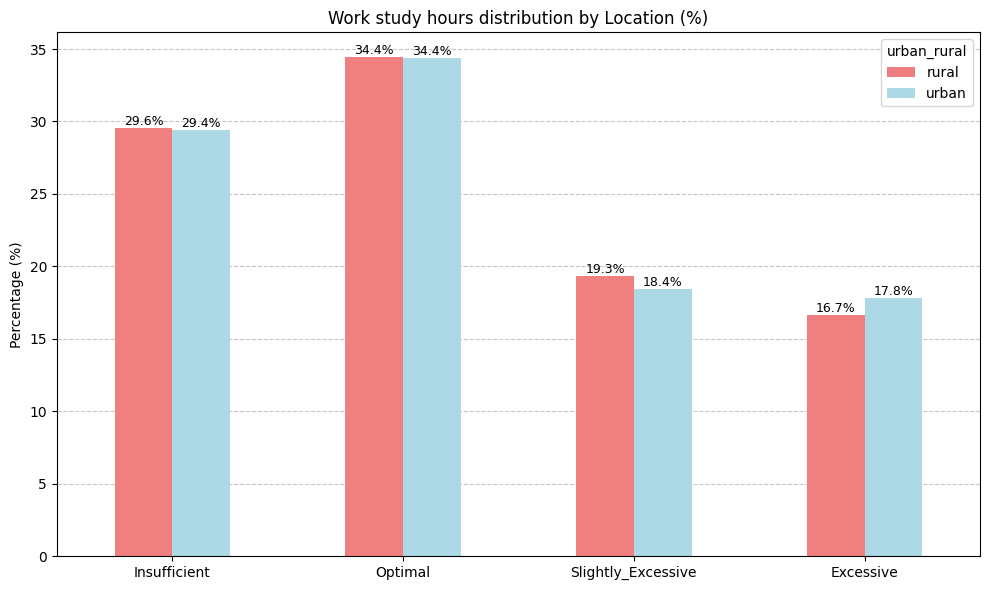

In [151]:
df_1 = data.copy()
# 생산시간에 따른 등급화 및 점수화
bins_labels = ['Insufficient', 'Optimal', 'Slightly_Excessive', 'Excessive']
bins_edges = [-0.1, 3, 8, 10, 12] # -0.1부터 시작하여 0시간 포함, 3시간 이하, 8시간 이하, 10시간 이하, 12시간 이하
df_1['work_study_hours_grade'] = pd.cut(df_1['work_study_hours'], bins=bins_edges, labels=bins_labels)


df_1['work_study_hours_grade'] = pd.Categorical(df_1['work_study_hours_grade'], categories=bins_labels, ordered=True)

age_crosstab = pd.crosstab(df_1['work_study_hours_grade'], df_1['urban_rural'], normalize='columns') * 100

ax = age_crosstab.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightblue'])

plt.title("Work study hours distribution by Location (%)")
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# 각 막대 위에 퍼센트 값 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

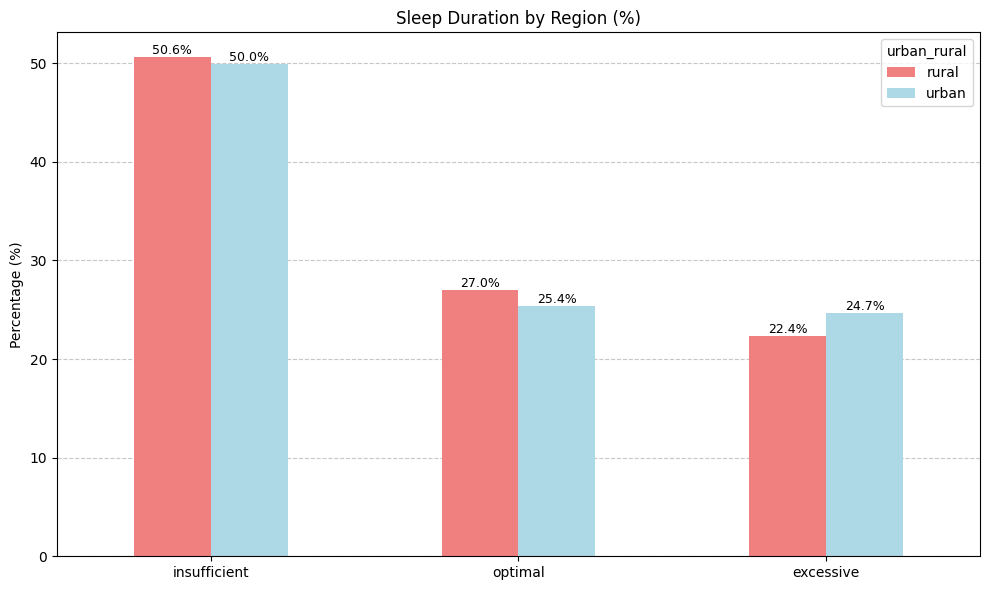

In [158]:
# sleep_duration
bins_labels = df_1['sleep_duration'].unique()
df_1['sleep_duration'] = pd.Categorical(df_1['sleep_duration'], categories=bins_labels, ordered=True)

age_crosstab = pd.crosstab(df_1['sleep_duration'], df_1['urban_rural'], normalize='columns') * 100

ax = age_crosstab.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightblue'])

plt.title("Sleep Duration by Region (%)")
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# 각 막대 위에 퍼센트 값 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [155]:
df_1['dietary_habits'].unique()

array(['Unhealthy', 'Moderate', 'Healthy'], dtype=object)

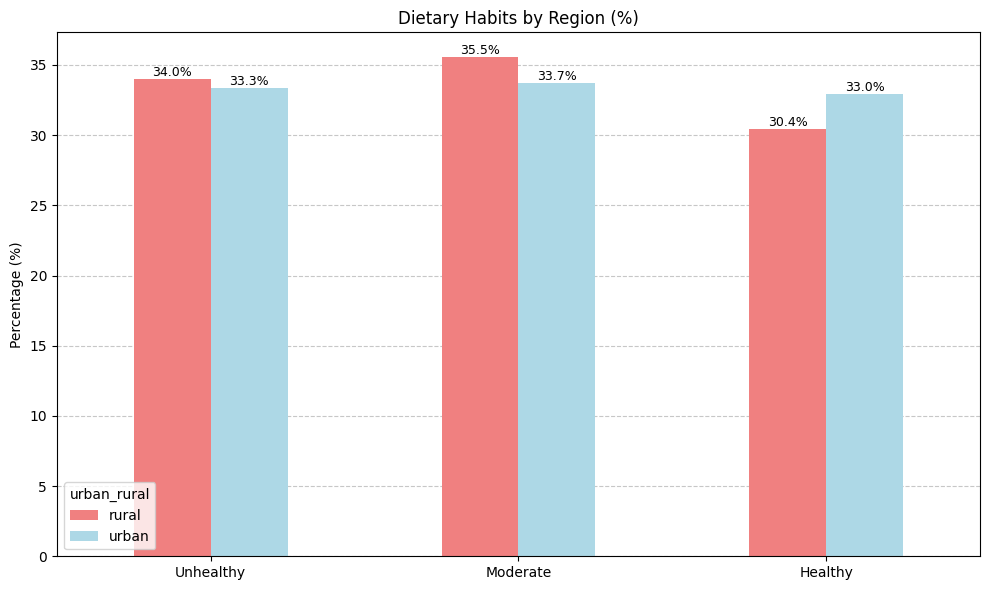

In [159]:
# sleep_duration
bins_labels = df_1['dietary_habits'].unique()
df_1['dietary_habits'] = pd.Categorical(df_1['dietary_habits'], categories=bins_labels, ordered=True)

age_crosstab = pd.crosstab(df_1['dietary_habits'], df_1['urban_rural'], normalize='columns') * 100

ax = age_crosstab.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightblue'])

plt.title("Dietary Habits by Region (%)")
plt.xlabel("")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)

# 각 막대 위에 퍼센트 값 추가
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### 스트레스지표 비교 - urban_rural 그룹별 work_study_pressure, financial_stress 
- 지역별 스트레스 특성 : 평균 및 분포 비교      
- 스트레스 검정 (동일성)

In [41]:
# 스트레스 지표는 다르게 나오는 것이 좋음
target_variables = ['work_study_pressure', 'financial_stress', 'work_study_satisfaction']

for var in target_variables:
    chi2_test(data, 'urban_rural', var)


카이제곱 통계량: 46.7992
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'work_study_pressure'의 분포는 다름

카이제곱 통계량: 29.0994
p-value: 0.0001
'rural' 그룹과 'urban' 그룹에서 'financial_stress'의 분포는 다름

카이제곱 통계량: 67.4551
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'work_study_satisfaction'의 분포는 다름


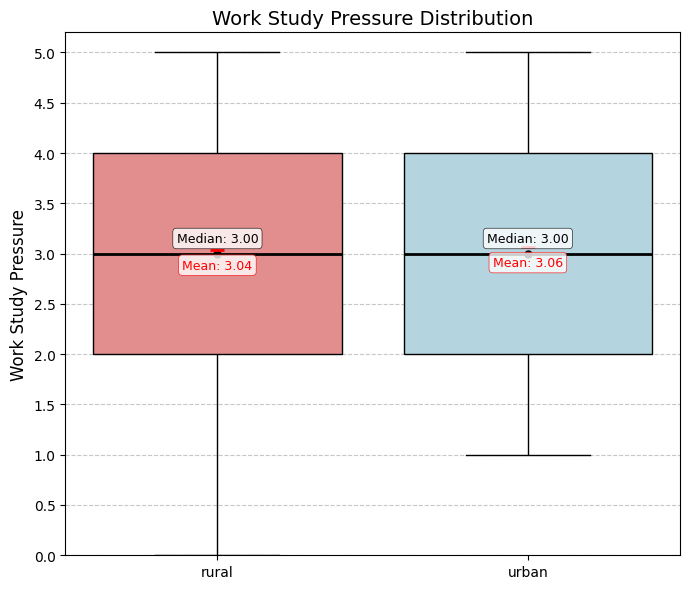

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

df_m = data.copy()

palette = {'rural': 'lightcoral', 'urban': 'lightblue'}

plt.figure(figsize=(7, 6)) # 단일 그래프이므로 figsize 조정
ax = plt.gca() # 현재 Axes 객체를 가져옵니다.

# y축 공통 범위 설정 (Scale Value 0-5)
y_min = 0
y_max = 5.2

# Work Study Pressure Distribution 박스플롯
sns.boxplot(x='urban_rural', y='work_study_pressure', data=df_m,
            palette=palette, ax=ax,
            boxprops={'edgecolor': 'black'}, # 박스 테두리 색상
            medianprops={'color': 'black', 'linewidth': 2}, # 중앙값 선 색상 및 두께
            whiskerprops={'color': 'black'}, # 수염 선 색상
            capprops={'color': 'black'}) # 캡 선 색상

ax.set_title('Work Study Pressure Distribution', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Work Study Pressure', fontsize=12)
ax.set_ylim(y_min, y_max) # y축 범위 설정
ax.set_yticks(np.arange(0, 5.1, 0.5)) # y축 눈금 설정 (이미지와 유사하게)
ax.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드
ax.set_axisbelow(True) # 그리드를 막대 뒤로 보내기

# Work Study Pressure의 평균과 중앙값 표시
for i, group in enumerate(['rural', 'urban']):
    subset = df_m[df_m['urban_rural'] == group]
    median_val = subset['work_study_pressure'].median()
    mean_val = subset['work_study_pressure'].mean()

    # 중앙값 표시
    ax.plot(i, median_val, 'o', color='black', markersize=5) # 점으로 표시
    ax.text(i, median_val + 0.15, f'Median: {median_val:.2f}',
             ha='center', va='center', fontsize=9, color='black',
             bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='black', lw=0.5, alpha=0.8)) # 텍스트 박스

    # 평균 표시
    ax.plot(i, mean_val, '_', color='red', markersize=10, markeredgewidth=2) # 평균은 가로 선으로 표시 (이미지처럼)
    ax.text(i, mean_val - 0.15, f'Mean: {mean_val:.2f}',
             ha='center', va='center', fontsize=9, color='red',
             bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='red', lw=0.5, alpha=0.8))


plt.tight_layout()
plt.show()

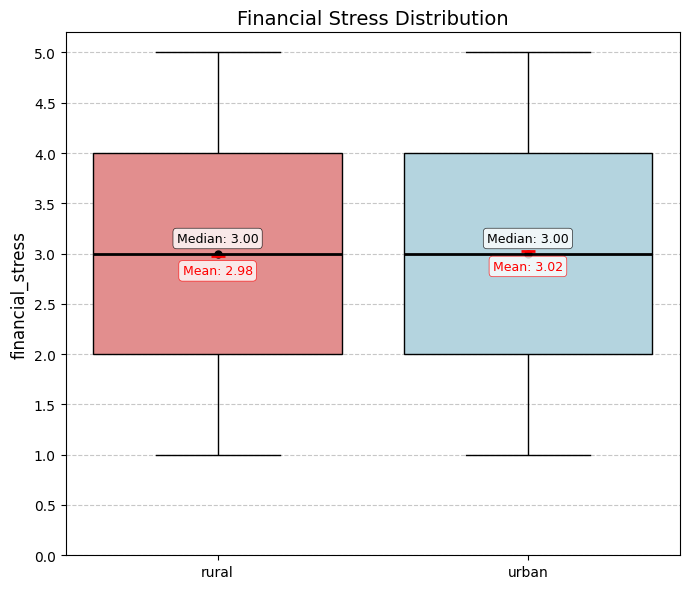

In [194]:
palette = {'rural': 'lightcoral', 'urban': 'lightblue'}

plt.figure(figsize=(7, 6)) # 단일 그래프이므로 figsize 조정
ax = plt.gca() # 현재 Axes 객체를 가져옵니다.

# y축 공통 범위 설정 (Scale Value 0-5)
y_min = 0
y_max = 5.2

# Work Study Pressure Distribution 박스플롯
sns.boxplot(x='urban_rural', y='financial_stress', data=df_m,
            palette=palette, ax=ax,
            boxprops={'edgecolor': 'black'}, # 박스 테두리 색상
            medianprops={'color': 'black', 'linewidth': 2}, # 중앙값 선 색상 및 두께
            whiskerprops={'color': 'black'}, # 수염 선 색상
            capprops={'color': 'black'}) # 캡 선 색상

ax.set_title('Financial Stress Distribution', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('financial_stress', fontsize=12)
ax.set_ylim(y_min, y_max) # y축 범위 설정
ax.set_yticks(np.arange(0, 5.1, 0.5)) # y축 눈금 설정 (이미지와 유사하게)
ax.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드
ax.set_axisbelow(True) # 그리드를 막대 뒤로 보내기

# Work Study Pressure의 평균과 중앙값 표시
for i, group in enumerate(['rural', 'urban']):
    subset = df_m[df_m['urban_rural'] == group]
    median_val = subset['financial_stress'].median()
    mean_val = subset['financial_stress'].mean()

    # 중앙값 표시
    ax.plot(i, median_val, 'o', color='black', markersize=5) # 점으로 표시
    ax.text(i, median_val + 0.15, f'Median: {median_val:.2f}',
             ha='center', va='center', fontsize=9, color='black',
             bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='black', lw=0.5, alpha=0.8)) # 텍스트 박스

    # 평균 표시
    ax.plot(i, mean_val, '_', color='red', markersize=10, markeredgewidth=2) # 평균은 가로 선으로 표시 (이미지처럼)
    ax.text(i, mean_val - 0.15, f'Mean: {mean_val:.2f}',
             ha='center', va='center', fontsize=9, color='red',
             bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='red', lw=0.5, alpha=0.8))


plt.tight_layout()
plt.show()

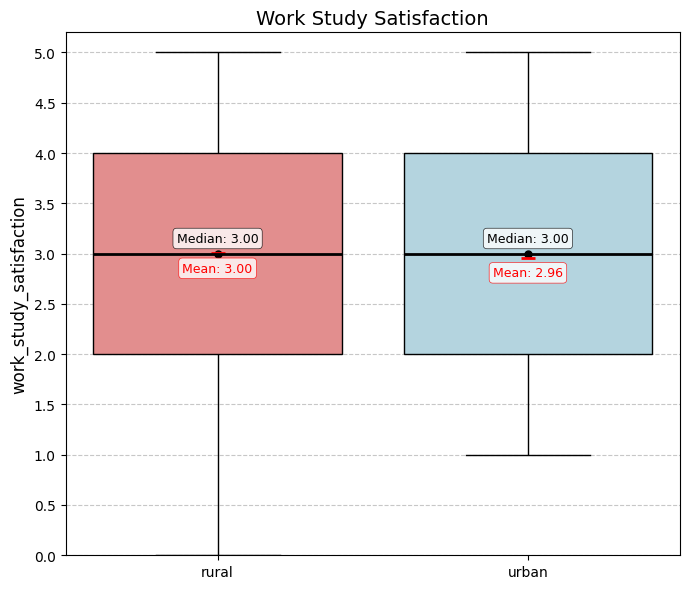

In [193]:
palette = {'rural': 'lightcoral', 'urban': 'lightblue'}

plt.figure(figsize=(7, 6)) # 단일 그래프이므로 figsize 조정
ax = plt.gca() # 현재 Axes 객체를 가져옵니다.

# y축 공통 범위 설정 (Scale Value 0-5)
y_min = 0
y_max = 5.2

# Work Study Pressure Distribution 박스플롯
sns.boxplot(x='urban_rural', y='work_study_satisfaction', data=df_m,
            palette=palette, ax=ax,
            boxprops={'edgecolor': 'black'}, # 박스 테두리 색상
            medianprops={'color': 'black', 'linewidth': 2}, # 중앙값 선 색상 및 두께
            whiskerprops={'color': 'black'}, # 수염 선 색상
            capprops={'color': 'black'}) # 캡 선 색상

ax.set_title('Work Study Satisfaction', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('work_study_satisfaction', fontsize=12)
ax.set_ylim(y_min, y_max) # y축 범위 설정
ax.set_yticks(np.arange(0, 5.1, 0.5)) # y축 눈금 설정 (이미지와 유사하게)
ax.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드
ax.set_axisbelow(True) # 그리드를 막대 뒤로 보내기

# Work Study Pressure의 평균과 중앙값 표시
for i, group in enumerate(['rural', 'urban']):
    subset = df_m[df_m['urban_rural'] == group]
    median_val = subset['work_study_satisfaction'].median()
    mean_val = subset['work_study_satisfaction'].mean()

    # 중앙값 표시
    ax.plot(i, median_val, 'o', color='black', markersize=5) # 점으로 표시
    ax.text(i, median_val + 0.15, f'Median: {median_val:.2f}',
             ha='center', va='center', fontsize=9, color='black',
             bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='black', lw=0.5, alpha=0.8)) # 텍스트 박스

    # 평균 표시
    ax.plot(i, mean_val, '_', color='red', markersize=10, markeredgewidth=2) # 평균은 가로 선으로 표시 (이미지처럼)
    ax.text(i, mean_val - 0.15, f'Mean: {mean_val:.2f}',
             ha='center', va='center', fontsize=9, color='red',
             bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='red', lw=0.5, alpha=0.8))


plt.tight_layout()
plt.show()

### 정신건강지표 비교 - urban_rural 그룹별 suidial_thoughts, depression
- 정신건강지표 특성 : 발생률(비율)비교, study_work_satisfaction의 평균 및 분포를 비교 (범주형 vs 범주형 : stacked bar chart)          
- 정신건강 검정(동일성)

In [42]:
# 정신건강 지표는 다르게 나오는 것이 좋음 - 가설은 도시가 더 좋을 것이다.
# 스트레스 지표는 다르게 나오는 것이 좋음
target_variables = ['suicidal_thoughts', 'depression']

for var in target_variables:
    chi2_test(data, 'urban_rural', var)


카이제곱 통계량: 4.3372
p-value: 0.0373
'rural' 그룹과 'urban' 그룹에서 'suicidal_thoughts'의 분포는 다름

카이제곱 통계량: 65.1902
p-value: 0.0000
'rural' 그룹과 'urban' 그룹에서 'depression'의 분포는 다름


### 상관 분석
- urban_rural 그룹별 : sleep_duration, dietary_habits(수치화 후),work_study_hours 와 depression, suidial_thoughts, work_study_satisfaction 간의 상관관계              
- 전체 데이터에서의 상관관계                

In [163]:
sleep_map = {'insufficient': 0,'optimal': 2,'excessive': 1}
diet_map = {'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2}

df_1 = data.copy()
df_1['sleep_duration'] = df_1['sleep_duration'].map(sleep_map)
df_1['dietary_habits'] = df_1['dietary_habits'].map(diet_map)

In [164]:
bins_labels = ['Insufficient', 'Optimal', 'Slightly_Excessive', 'Excessive']
bins_edges = [-0.1, 3, 8, 10, 12] # -0.1부터 시작하여 0시간 포함, 3시간 이하, 8시간 이하, 10시간 이하, 12시간 이하
df_1['work_study_hours_grade'] = pd.cut(df_1['work_study_hours'], bins=bins_edges, labels=bins_labels)

grade_to_score_map = {
    'Optimal': 2,
    'Insufficient': 1,
    'Slightly_Excessive': 1,
    'Excessive': 0
}
df_1['work_study_hours_score'] = df_1['work_study_hours_grade'].map(grade_to_score_map)


In [165]:
df_1.columns

Index(['id', 'name', 'gender', 'age', 'age_group', 'city', 'profession',
       'cgpa', 'degree', 'work_study_pressure', 'work_study_satisfaction',
       'financial_stress', 'sleep_duration', 'dietary_habits',
       'work_study_hours', 'family_mh_history', 'suicidal_thoughts',
       'depression', 'urban_rural', 'work_study_hours_grade',
       'work_study_hours_score'],
      dtype='object')

In [166]:
df_1['life_style_score'] = df_1['sleep_duration'] + df_1['dietary_habits'] + df_1['work_study_hours_score']
df_1['stress_score'] = (df_1['work_study_pressure'] + df_1['financial_stress'] - df_1['work_study_satisfaction'])
df_1['mental_health_score'] = df_1['suicidal_thoughts'] + df_1['depression']

In [167]:
df_1['stress_score'].min() , df_1['stress_score'].max()

(-3.0, 9.0)

In [168]:
a = df_1[df_1['urban_rural'] == 'urban']['work_study_satisfaction'].value_counts()
b = df_1[df_1['urban_rural'] == 'rural']['work_study_satisfaction'].value_counts()
df_1

df_1['work_study_satisfaction'].groupby(df_1['urban_rural']).value_counts()

urban_rural  work_study_satisfaction
rural        2.0                        5312
             3.0                        5203
             4.0                        5058
             5.0                        4837
             1.0                        4659
             0.0                           3
urban        2.0                        6235
             5.0                        5271
             1.0                        5191
             3.0                        5160
             4.0                        4951
Name: count, dtype: int64

In [169]:
df_1['work_study_satisfaction'].value_counts()

work_study_satisfaction
2.0    11547
3.0    10363
5.0    10108
4.0    10009
1.0     9850
0.0        3
Name: count, dtype: int64

In [170]:
df_1['life_style_score'].value_counts()

life_style_score
3    14235
2    12255
4    10891
1     6310
5     5087
0     1688
6     1414
Name: count, dtype: int64

In [171]:
df_1['stress_score'].min(),df_1['stress_score'].max()

(-3.0, 9.0)

In [172]:
df_1[['life_style_score', 'stress_score', 'mental_health_score','urban_rural']].groupby('urban_rural').mean().round(2).T

urban_rural,rural,urban
life_style_score,2.91,2.92
stress_score,3.01,3.12
mental_health_score,0.67,0.69


In [173]:
degree_group = {
    'Unknown': 'UNK',
    'HighSchool': 'UG-',

    # Undergraduate (학사)
    'BHM': 'UG',
    'LLB': 'UG',
    'BPharm': 'UG',
    'BBA': 'UG',
    'BSc': 'UG',
    'BE': 'UG',
    'BArch': 'UG',
    'BCA': 'UG',
    'BA': 'UG',
    'BCom': 'UG',
    'BH': 'UG',
    'BEd': 'UG',
    'BTech': 'UG',

    # Postgraduate (석사 이상)
    'MBA': 'PG',
    'MCom': 'PG',
    'MHM': 'PG',
    'MA': 'PG',
    'MTech': 'PG',
    'PhD': 'PG',
    'MEd': 'PG',
    'MSc': 'PG',
    'LLM': 'PG',
    'MCA': 'PG',
    'MD': 'PG',
    'MBBS': 'UG', # MBBS는 학사로 분류
    'MPharm': 'PG',
    'MPA': 'PG',
    'ME': 'PG',
    'MArch': 'PG'
}

# 카테고리 매핑
df_1['degree_level'] = df_1['degree'].map(degree_group)

In [174]:
job_cat = {
    # 학생 및 무직
    'student': 'STU',
    'unemployed': 'UNEMP',

    # IT & 기술직
    'software engineer': 'TECH',
    'data scientist': 'TECH',
    'ux/ui designer': 'TECH',
    'digital marketer': 'MGMT',  # 디지털 마케팅은 관리/경영 직군으로 분류
    'analyst': 'TECH',
    'research analyst': 'TECH',

    # 전문직
    'doctor': 'PROF',
    'medical doctor': 'PROF',
    'pharmacist': 'PROF',
    'accountant': 'PROF',
    'lawyer': 'PROF',
    'judge': 'PROF',
    'investment banker': 'PROF',

    # 관리자/경영/분석
    'manager': 'MGMT',
    'marketing manager': 'MGMT',
    'hr manager': 'MGMT',
    'business analyst': 'MGMT',
    'financial analyst': 'MGMT',
    'city manager': 'MGMT',

    # 서비스/지원
    'customer support': 'SERV',
    'sales executive': 'SERV',
    'travel consultant': 'SERV',
    'family consultant': 'SERV',
    'content writer': 'CRE', # 수정
    'chef': 'SERV',

    # 교육 및 학문
    'teacher': 'EDU',
    'academic': 'EDU',
    'educational consultant': 'EDU',
    'researcher': 'EDU',

    # 컨설팅
    'consultant': 'CONS',

    # 엔지니어링
    'civil engineer': 'ENG',
    'mechanical engineer': 'ENG',
    'architect': 'ENG',

    # 창작/디자인
    'graphic designer': 'CRE',
    'pilot': 'CRE',
    'entrepreneur': 'CRE',  # 자영업자 창업자도 여기에 넣음 (유동적)

    # 기타
    # 생략된 경우 자동으로 'OTH' 처리 가능
}

df_1['profession_group'] = df_1['profession'].map(job_cat).fillna('OTH')

In [177]:
df_2 = pd.get_dummies(df_1, columns=['profession_group', 'degree_level', 'age_group'], drop_first=True)

In [178]:
df_2.columns

Index(['id', 'name', 'gender', 'age', 'city', 'profession', 'cgpa', 'degree',
       'work_study_pressure', 'work_study_satisfaction', 'financial_stress',
       'sleep_duration', 'dietary_habits', 'work_study_hours',
       'family_mh_history', 'suicidal_thoughts', 'depression', 'urban_rural',
       'work_study_hours_grade', 'work_study_hours_score', 'life_style_score',
       'stress_score', 'mental_health_score', 'profession_group_CRE',
       'profession_group_EDU', 'profession_group_ENG', 'profession_group_MGMT',
       'profession_group_OTH', 'profession_group_PROF',
       'profession_group_SERV', 'profession_group_STU',
       'profession_group_TECH', 'profession_group_UNEMP', 'degree_level_UG',
       'degree_level_UG-', 'degree_level_UNK', 'age_group_26-35',
       'age_group_36-45', 'age_group_46-55', 'age_group_56-65'],
      dtype='object')


urban group correlation matrix:


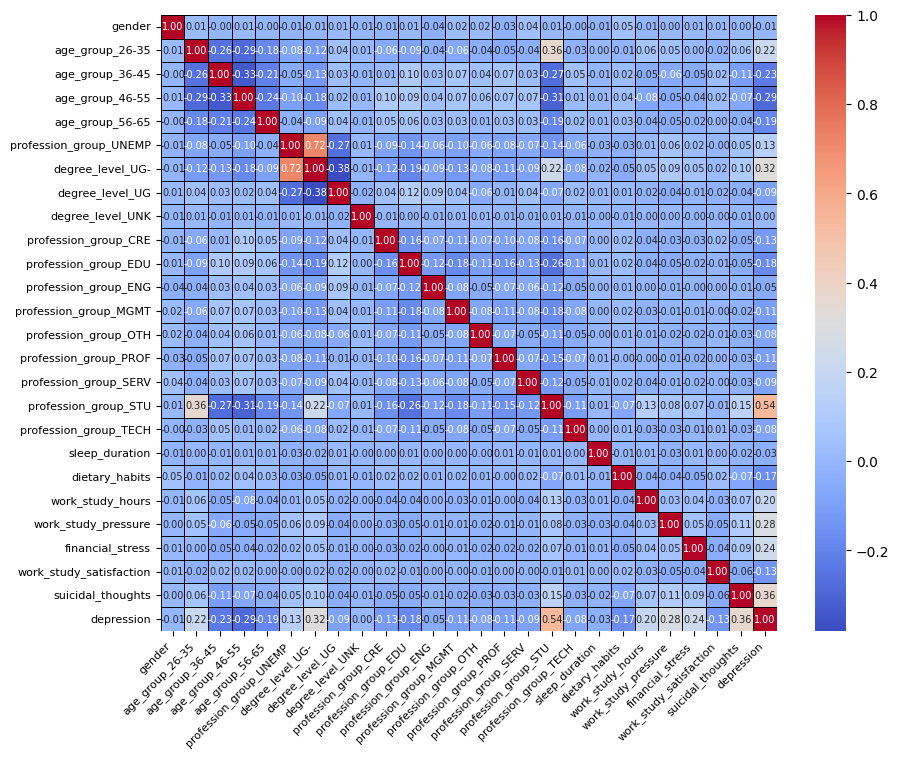


rural group correlation matrix:


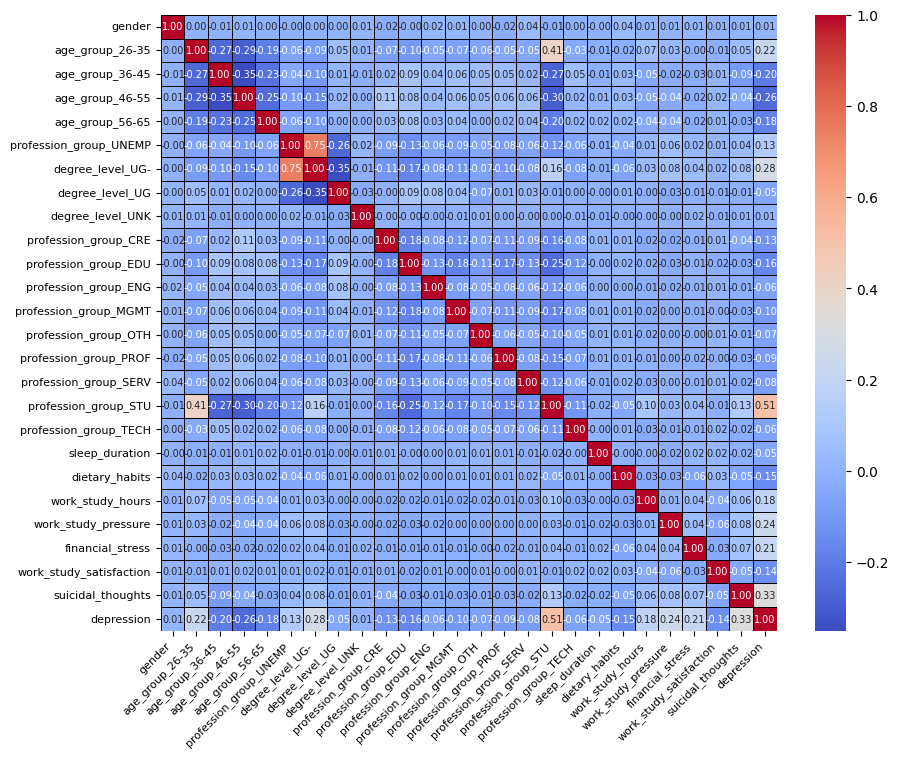

In [179]:
cor_var = [
    'gender',
    'age_group_26-35','age_group_36-45', 'age_group_46-55', 'age_group_56-65',
    'profession_group_UNEMP','degree_level_UG-','degree_level_UG','degree_level_UNK',
    'profession_group_CRE', 'profession_group_EDU', 'profession_group_ENG',
    'profession_group_MGMT', 'profession_group_OTH',
    'profession_group_PROF', 'profession_group_SERV',
    'profession_group_STU', 'profession_group_TECH',
    'sleep_duration','dietary_habits','work_study_hours',
    'work_study_pressure','financial_stress',
    'work_study_satisfaction','suicidal_thoughts','depression'
]

urban = df_2[df_2['urban_rural'] == 'urban']
rural = df_2[df_2['urban_rural'] == 'rural']

groups = {'urban': urban, 'rural': rural}

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

method = 'spearman' # ordinal 데이터가 있으므로 'spearman' / 'pearson'은 연속형 데이터에 적합

for groups_name, group_data in groups.items():
    print(f"\n{groups_name} group correlation matrix:")
    corr_matrix = group_data[cor_var].corr(method=method)
    # print(corr_matrix)
    
    # 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, 
                annot=True, # 주석 표시
                cmap='coolwarm', 
                fmt='.2f', 
                square=True,
                annot_kws={'fontsize':7}, 
                linewidths=0.5, 
                linecolor='black')
    plt.xticks(rotation=45, ha='right', fontsize=8) # x축 레이블 회전
    plt.yticks(rotation=0, fontsize=8)

    plt.show()

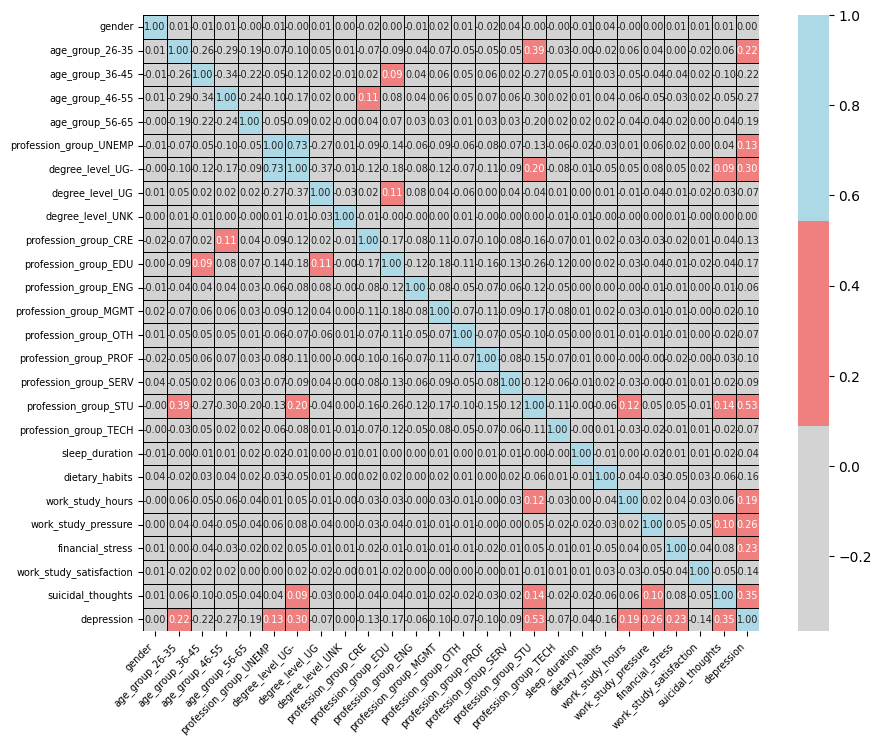

In [183]:
# 전체 데이터에 대한 상관 행렬

cor_var = [
    'gender',
    'age_group_26-35','age_group_36-45', 'age_group_46-55', 'age_group_56-65',
    'profession_group_UNEMP','degree_level_UG-','degree_level_UG','degree_level_UNK',
    'profession_group_CRE', 'profession_group_EDU', 'profession_group_ENG',
    'profession_group_MGMT', 'profession_group_OTH',
    'profession_group_PROF', 'profession_group_SERV',
    'profession_group_STU', 'profession_group_TECH',
    'sleep_duration','dietary_habits','work_study_hours',
    'work_study_pressure','financial_stress',
    'work_study_satisfaction','suicidal_thoughts','depression'
]

corr_matrix = df_2[cor_var].corr(method=method)

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
                annot=True, # 주석 표시
                cmap=sns.color_palette(["lightgray", "lightcoral", "lightblue"]), 
                fmt='.2f', 
                square=True,
                annot_kws={'fontsize':7}, 
                linewidths=0.5, 
                linecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=7) # x축 레이블 회전
plt.yticks(rotation=0, fontsize=7)

plt.show()